# Candidate Number : 229543

# NOTE FOR EXAMINER: Code may take a few minutes to complete running

# Physical Activity Monitoring Analysis

# Contents: 

### 1. Introduction
### 2. Importing Data
### 3. Data Cleaning
### 4. Normality Check
### 5. Exploratory Data Analysis
### 6. Hypothesis Testing
### 7. Development and Testing
### 8. Summary

# 1. Introduction

For this assessment I will be using the PAMAP2 dataset which consists of Physical Activity Monitoring of 18 different physical activities (such as walking, cycling, playing soccer etc) performed by 9 subjects wearing 3 inertial measurement units (IMU) on the hand, chest and ankle with a heart rate monitor included in the measurement too. The data I will be utilising is sensory data which comes in various formats such as temperature, acceleration, gyroscope and magnetometer data. The goal of this assessment should be to gain insights based on the results of our analysis to determine how active an individual is based on the physical activities taken which are to be used to create hardware and/or software using suitbale conclusions I have found from my analysis of the dataset. 

Initially, I'll begin by cleaning my data to remove any NaN (null) values and also potentially implement mean imputation to maintain the variability of my data followed by check the normality of my data to see the weightings of each category, with the use of shapiro-wilk test and probability plots. Then, I will carry out exploratory analyses techniques such as producing box plots, heatmaps and correlation matrix to gain a better understanding of my data from a visual perspective. Hypothesis testing will also be used to discover any noticeable correlations between certain exercises that may affect the results to a significant degree, which I can then use to draw valuable conclusions to justify my findings. Utilising my findings, I will decide the best actions to proceed with for developing software and hardware for developing an app that can determine the amount and type of physical activity carried out by an individual.

Significant goals of assessment:

1. Carry out thorough exploratory data analysis and appropriately handle missing or dirty data;
2. Develop and test at least one hypothesis for a relationship between a single pair of attributes;
3. Develop and test at least one model which uses multiple attributes to make predictions.

# 2. Importing Data

In [1]:
# Importing packages into notebook for analysis tools

import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from scipy.stats import ttest_ind
import pylab
import math
from matplotlib.colors import LinearSegmentedColormap
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler

A list of the file names has to be created in order to load all the files and create the dataframe. Moreover, a dictionary that will hold the names as well as numbers of each different activity was created in order to be able to understand which activity is being analysed at each phase.

Furthermore, I have created 3 lists to separate the activities into intensity levels according to the descriptions of each activity in the readme.pdf file. The lists are light, moderate and strenuous with the lists having even number of activities.

Lists for each different category of IMU's have to be put together as well in order to have the column names for the dataframe. IMU's that will be used are for chest, ankle and hand. Then all the different lists will be merged together to create a collection of columns which the dataframe will consist of.

In [2]:
# Load data

list_of_files = ['PAMAP2_Dataset/Protocol/subject101.dat',
                 'PAMAP2_Dataset/Protocol/subject102.dat',
                 'PAMAP2_Dataset/Protocol/subject103.dat',
                 'PAMAP2_Dataset/Protocol/subject104.dat',
                 'PAMAP2_Dataset/Protocol/subject105.dat',
                 'PAMAP2_Dataset/Protocol/subject106.dat',
                 'PAMAP2_Dataset/Protocol/subject107.dat',
                 'PAMAP2_Dataset/Protocol/subject108.dat',
                 'PAMAP2_Dataset/Protocol/subject109.dat' ]

 # Corresponding subject IDs with the participants involved
subjectID = [101,102,103,104,105,106,107,108,109] 

# List of activities with their unique ID assigned
Acts_ID = {0: 'transient',   
              1: 'lying',
              2: 'sitting',
              3: 'standing',
              4: 'walking',
              5: 'running',
              6: 'cycling',
              7: 'Nordic_walking',
              9: 'watching_TV',
              10: 'computer_work',
              11: 'car driving',
              12: 'ascending_stairs',
              13: 'descending_stairs',
              16: 'vacuum_cleaning',
              17: 'ironing',
              18: 'folding_laundry',
              19: 'house_cleaning',
              20: 'playing_soccer',
              24: 'rope_jumping' }

# List of activities by ID 
# Protocol Activities: lying, sitting, standing, walking, running, cycling, Nordic walking, ascending stairs,
# descending stairs, vacuum cleaning, ironing, rope jumping
Proto_activities = [1,2,3,4,5,6,7,12,13,16,17,24]

# lying, sitting, standing and ironing
light_acts = [1,2,3,17]

# walking, cycling,Nordic walking, descending stairs, vacuum cleaning  
moderate_acts = [4,6,7,13,16] 

# running, ascending stairs, rope jumping
strenuous_acts = [5,12,24] 

#Function used to classify activities

def intense_ident(activities):
    if activities in light_acts:
        return 'light'
    if activities in moderate_acts:
        return 'moderate'
    if activities in strenuous_acts:
        return 'strenuous'

colNames = ["Timestamp", "Activity_ID","Heartrate"]

# IMU measurement by hand with sensory data in list
IMUhand = ['handTemperature',  
           'handAcc16_1', 'handAcc16_2', 'handAcc16_3', 
           'handAcc6_1', 'handAcc6_2', 'handAcc6_3', 
           'handGyro1', 'handGyro2', 'handGyro3', 
           'handMagne1', 'handMagne2', 'handMagne3',
           'handOrientation1', 'handOrientation2', 'handOrientation3', 'handOrientation4']

# IMU measurement by chest with sensory data in list
IMUchest = ['chestTemperature', 
           'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 
           'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3', 
           'chestGyro1', 'chestGyro2', 'chestGyro3', 
           'chestMagne1', 'chestMagne2', 'chestMagne3',
           'chestOrientation1', 'chestOrientation2', 'chestOrientation3', 'chestOrientation4']
# IMU measurement by ankle with sensory data in list
IMUankle = ['ankleTemperature', 
           'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3', 
           'ankleAcc6_1', 'ankleAcc6_2', 'ankleAcc6_3', 
           'ankleGyro1', 'ankleGyro2', 'ankleGyro3', 
           'ankleMagne1', 'ankleMagne2', 'ankleMagne3',
           'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4']

# Combining all columns in one list
columns = colNames + IMUhand + IMUchest + IMUankle  

# 3. Data Cleaning

## 3.1 Null Values 

In [3]:
# Converting data in  dataframe 

Physicaldata = pd.DataFrame() 
for file in list_of_files: # Iterate through list of subjects 
    procData = pd.read_table(file, header=None, sep='\s+') # Read general delimited file into DataFrame
    procData.columns = columns
    procData['subject_id'] = int(file[-7:-4]) # Specifiying the number value changing which differ
    procData['Intensity'] = procData['Activity_ID'].apply(intense_ident)
    Physicaldata = Physicaldata.append(procData, ignore_index=True) # Append subject ID


Physicaldata.reset_index(drop=True, inplace=True)
Physicaldata.head(15)

,Timestamp,Activity_ID,Heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id,Intensity
0,8.38,0,104.0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0,101,None
1,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0,101,None
2,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0,101,None
3,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0,101,None
4,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0,101,None
5,8.43,0,NaN,30.0,2.29959,8.82929,3.54710,2.26132,8.65762,3.77788,...,0.001050,-60.2954,-38.8778,-58.3977,1.0,0.0,0.0,0.0,101,None
6,8.44,0,NaN,30.0,2.33738,8.82900,3.54767,2.27703,8.77828,3.73230,...,0.015594,-60.6307,-38.8676,-58.2711,1.0,0.0,0.0,0.0,101,None
7,8.45,0,NaN,30.0,2.37142,9.05500,3.39347,2.39786,8.89814,3.64131,...,-0.000785,-60.5171,-38.9819,-58.2733,1.0,0.0,0.0,0.0,101,None
8,8.46,0,NaN,30.0,2.33951,9.13251,3.54668,2.44371,8.98841,3.62596,...,0.017701,-61.2916,-39.6182,-58.1499,1.0,0.0,0.0,0.0,101,None
9,8.47,0,NaN,30.0,2.25966,9.09415,3.43015,2.42877,9.01871,3.61081,...,0.014498,-60.8509,-39.0821,-58.1478,1.0,0.0,0.0,0.0,101,None


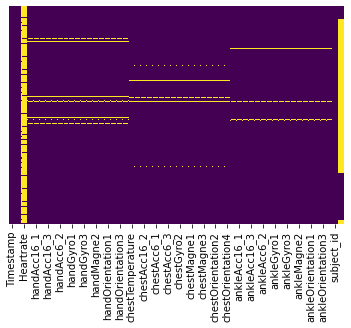

In [4]:
#Identifying frequency of null values in every category for last 30000 entries

s = sns.heatmap(Physicaldata.tail(30000).isnull(), yticklabels = False,cbar = False,cmap = 'viridis')

From the brief, data has been lost through using wireless sensors and complications with hardware setup, as a result this has lead to null values emerging that will need to be removed. Noticing the first 15 values of the dataframe and looking at the above heatmap using seaborn of the last 30000 rows entry values, we can gain an estimate of which categories contains the most null values and a rough idea to how many null values are present in my data set. The null values in the heatmap are represented as horizontal yellow dashes, so my data contains a significant amount, predominantly in the heartrate column. Furtheremore, activityID 0 must be removed completely from the dataset since this is transient period where the subject was moving between locations for consecutive activities or waiting for equipment to be prepared, hence the data is not valid for analysing and can be discarded.

In [5]:
# Produce a column of all categories showing number of null values in each caloumn

Physicaldata.isnull().sum() 

Timestamp                  0
Activity_ID                0
Heartrate            2610265
handTemperature        13141
handAcc16_1            13141
handAcc16_2            13141
handAcc16_3            13141
handAcc6_1             13141
handAcc6_2             13141
handAcc6_3             13141
handGyro1              13141
handGyro2              13141
handGyro3              13141
handMagne1             13141
handMagne2             13141
handMagne3             13141
handOrientation1       13141
handOrientation2       13141
handOrientation3       13141
handOrientation4       13141
chestTemperature        3563
chestAcc16_1            3563
chestAcc16_2            3563
chestAcc16_3            3563
chestAcc6_1             3563
chestAcc6_2             3563
chestAcc6_3             3563
chestGyro1              3563
chestGyro2              3563
chestGyro3              3563
chestMagne1             3563
chestMagne2             3563
chestMagne3             3563
chestOrientation1       3563
chestOrientati

Here we can clearly see the number of null values present in each category over the whole dataframe and it's evident there are many null values present which need removing. However, removing all null values would only reduce the power of my analysis so other methods will be used to counteract this.

## 3.2 Dropping and Filling Values 

In [6]:
def dataCleaning(DataFrame):
  
        # Calculating the mean values of each of the respective coloumns and using mean imputation to replace NaN values
    
        # Replacing coloumns with NaN values with the above new columns undergoing mean imputation
        
        cols = ['chestTemperature','chestAcc16_1','chestAcc16_2','chestAcc16_3','chestAcc6_1','chestAcc6_2','chestAcc6_3',
            'chestGyro1','chestGyro2','chestGyro3','chestMagne1','chestMagne2','chestMagne3']
            
        for colName in cols:
            DataFrame[colName] = DataFrame[colName].fillna(DataFrame[colName].mean())       

        
        # Removal of orientation columns as they are not needed for fututure calculations 
        
        DataFrame = DataFrame.drop(['handOrientation1', 'handOrientation2', 'handOrientation3', 'handOrientation4',
                                             'chestOrientation1', 'chestOrientation2', 'chestOrientation3', 'chestOrientation4',
                                             'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4'],
                                             axis = 1)
        
        # Removal of any row of activity 0 as it is considered transient activity which will not be used
        
        DataFrame = DataFrame.drop(DataFrame[DataFrame.Activity_ID == 0].index) 
        activity_mean = DataFrame.groupby(['Activity_ID']).mean().reset_index()
        
        # Removal of any remaining NaN value cells by constructing new data points in known set of data points
        
        DataFrame = DataFrame.interpolate() 
        
        # Interpolating remaining NaN values in Heartrate category
        
        for i in range(0,4):
            DataFrame["Heartrate"].iloc[i] = 100
        
        return DataFrame

For categories containing 3563 NaN values I used mean imputation. This keeps the sample size consistent for these categories although the variability in the data is reduced so the standard deviations and variance may be underestimated. To avoid reducing the power of my analysis and increasing the margin of error, I decided not to drop NAN values from categories containing over 10000 NaN values. Instead I used linear interpolation which interpolates between known data values to obtain values to replace the NaN values for the respective category. Given that consecutive datapoints are fairly similar linear interpolation is sensible to utilise as a large difference between data points wouldn't give suitable interpolations. However, the Heartrate category contains 4 NaN values after the interpolation given that interpolation works via calculations around the NaN values. From the 4th value to the 39th value in the Heartrate column the values are all 100 so we can assume the first 4 NaN values should take the values 100 as well. Hence, I have introduced a for loop to eliminate the first 4 NaN values and replace them with the value 100.

In [7]:
# Establishing a new data frame

New_set = dataCleaning(Physicaldata)
New_set.head(15)

/Users/faheemshahin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Timestamp,Activity_ID,Heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,subject_id,Intensity
2928,37.66,1,100.0,30.375,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,...,-1.76757,0.265761,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.3696,101,light
2929,37.67,1,100.0,30.375,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,...,-1.75247,0.250816,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.3656,101,light
2930,37.68,1,100.0,30.375,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,...,-1.73721,0.356632,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119,101,light
2931,37.69,1,100.0,30.375,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,...,-1.78264,0.311453,-0.032514,-0.018844,0.026950,-60.7646,-37.1028,-57.8799,101,light
2932,37.70,1,100.0,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,...,-1.75240,0.295902,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,101,light
2933,37.71,1,100.0,30.375,2.07165,7.25965,6.01218,2.19238,7.21038,6.01604,...,-1.75239,0.311276,0.003793,-0.026906,0.004125,-61.3257,-36.9744,-57.7501,101,light
2934,37.72,1,100.0,30.375,2.41148,7.59780,5.93915,2.23988,7.46679,6.03053,...,-1.76748,0.326060,0.036814,-0.032277,-0.006866,-61.5520,-36.9632,-57.9957,101,light
2935,37.73,1,100.0,30.375,2.32815,7.63431,5.70686,2.31663,7.64745,6.01495,...,-1.76749,0.326380,-0.010352,-0.016621,0.006548,-61.5738,-36.1724,-59.3487,101,light
2936,37.74,1,100.0,30.375,2.25096,7.78598,5.62821,2.28637,7.70801,5.93935,...,-1.72212,0.326234,0.039346,0.020393,-0.011880,-61.7741,-37.1744,-58.1199,101,light
2937,37.75,1,100.0,30.375,2.14107,7.52262,5.78141,2.31538,7.72276,5.78828,...,-1.70699,0.326105,0.029874,-0.010763,0.005133,-60.7680,-37.4206,-58.8735,101,light


In [8]:
# As we can see now there are no NaN values existing in each category after the datacleaning process

New_set.isnull().sum() 

Timestamp           0
Activity_ID         0
Heartrate           0
handTemperature     0
handAcc16_1         0
handAcc16_2         0
handAcc16_3         0
handAcc6_1          0
handAcc6_2          0
handAcc6_3          0
handGyro1           0
handGyro2           0
handGyro3           0
handMagne1          0
handMagne2          0
handMagne3          0
chestTemperature    0
chestAcc16_1        0
chestAcc16_2        0
chestAcc16_3        0
chestAcc6_1         0
chestAcc6_2         0
chestAcc6_3         0
chestGyro1          0
chestGyro2          0
chestGyro3          0
chestMagne1         0
chestMagne2         0
chestMagne3         0
ankleTemperature    0
ankleAcc16_1        0
ankleAcc16_2        0
ankleAcc16_3        0
ankleAcc6_1         0
ankleAcc6_2         0
ankleAcc6_3         0
ankleGyro1          0
ankleGyro2          0
ankleGyro3          0
ankleMagne1         0
ankleMagne2         0
ankleMagne3         0
subject_id          0
Intensity           0
dtype: int64

# 4. Normality Check

## 4.1 Shapiro Wilk

It is important to note that in this data set I have data which is dependent and independent so using I had to use appropriate measurements to understand the distribution of my data for specific variables. For this scenario I will focus on the temperature variables given that this will be an area of interest for later analysis.In addition, I will the normal distribution of heartrate too. Initally, I have used a shapiro wilk test, although using the whole dataset will result in p values of 0, Therefore, I have used 0.1% of the dataset which still equates to 1942 random samples to show the p-value converging to 0 as the sample size becomes larger. 

In [9]:
# Sample size of heartrates 
# Sample size of 0.1% temperatures

Heart = New_set['Heartrate']
hand = New_set['handTemperature'] # Data points of handTemperature column
ankle = New_set['ankleTemperature'] # Data points of ankleTemperature column
chest = New_set['chestTemperature'] # Data points of chestTemperature column


Heart_samp = Heart.sample(frac=0.001, replace=True, random_state=1) # Selecting a random sample from heartrate category
hand_samp = hand.sample(frac=0.001, replace=True, random_state=1) # Selecting a random sample from all 3 body parts
ankle_samp = ankle.sample(frac=0.001, replace=True, random_state=1)
chest_samp = chest.sample(frac=0.001, replace=True, random_state=1)

# Shapiro Wilk Test
print('Heartrate')
print(stats.shapiro(Heart_samp))
print('\n')
print('Hand')
print(stats.shapiro(hand_samp))
print('\n')
print('Ankle')
print(stats.shapiro(ankle_samp))
print('\n')
print('Chest')
print(stats.shapiro(chest_samp))

Heartrate
ShapiroResult(statistic=0.9569336175918579, pvalue=1.5722382805176513e-23)


Hand
ShapiroResult(statistic=0.9330898523330688, pvalue=1.12538863516538e-28)


Ankle
ShapiroResult(statistic=0.9255510568618774, pvalue=5.2882203220894335e-30)


Chest
ShapiroResult(statistic=0.9477293491363525, pvalue=1.0026315485877339e-25)


The p-values are all less than 0.05 so we can reject the null and accept the alternative hypothesis of a shapiro wilk test that is the data doesn't follow a normal distribution.

## 4.2 Histograms

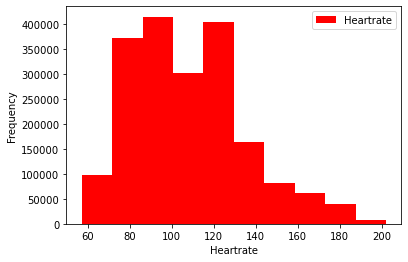

In [10]:
ax = New_set['Heartrate'].plot(kind='hist', color = 'red')
ax.set_xlabel("Heartrate")
ax.legend(prop={'size': 10})

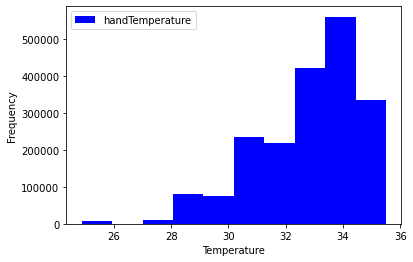

In [11]:
ax = New_set['handTemperature'].plot(kind='hist', color = 'blue')
ax.set_xlabel("Temperature")
ax.legend(prop={'size': 10})

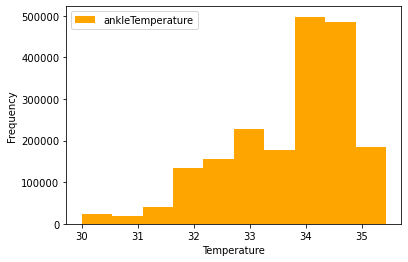

In [12]:
bx = New_set['ankleTemperature'].plot(kind='hist',color = 'orange')
bx.set_xlabel("Temperature")
bx.legend(prop={'size': 10})

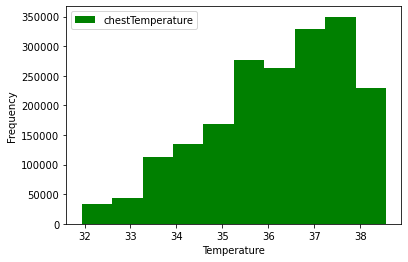

In [13]:
cx = New_set['chestTemperature'].plot(kind='hist',color = 'green')
cx.set_xlabel("Temperature")
cx.legend(prop={'size': 10})

Chest temperature had fewer datapoints compared to hand and ankles but all 3 body parts show temperatures with a negative skewness meaning that the median is higher than the mean in all cases. However looking at the heartrate historgramr we can see that it follows a different trend and the data looks positively skewed implying the mean value is higher than the median.

## 4.3 Probability Plots

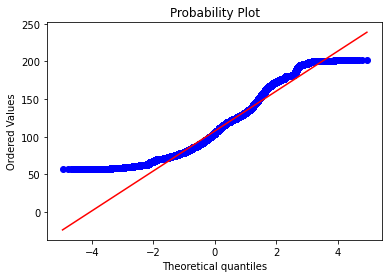

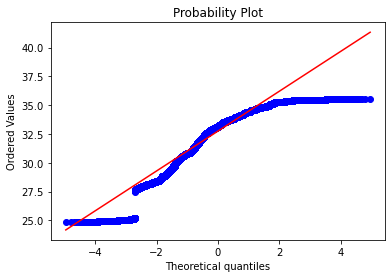

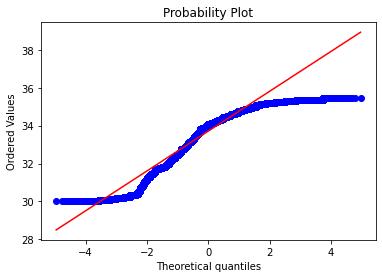

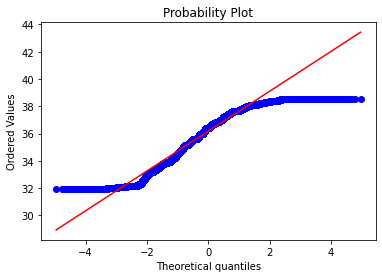

In [14]:
# Probability plots of heartrate
stats.probplot(New_set['Heartrate'], dist = "norm", plot =pylab)
pylab.show()

# Probability plots of hand temperature
stats.probplot(New_set['handTemperature'], dist = "norm", plot =pylab)
pylab.show()

#probability plot of ankle temperature
stats.probplot(New_set['ankleTemperature'], dist = "norm", plot =pylab)
pylab.show()

#probability plot of chest temperature
stats.probplot(New_set['chestTemperature'], dist = "norm", plot =pylab)
pylab.show()

From the probability plots we can observe that the plots follow a relatively linear correlation win the centre but tail off nearer to the ends of the plot. All graphs have many data points not lying on the normal distribution line (red line) so we can conclude that these variables are not normally distributed. These methods carried out showed my dataset set is not normally distributed and had I used the full set dataset instead of 0.1% sample my data would show  deviation from normality too. 

## 4.4 Central Limit Theorem

Even though our distributions are non normal we can use central limit theorem which gives us the ability to measure how much the means of various samples will vary. The more sample means taken the more the distribution of the samples means tends towards normal. When the sample size is quite large the normal distribution tends to be quite steep. So, we can apply the central limit theorem with very large datasets which is our case. With this information we can carry out an investigation and apply hypothesis testing as the mean of our 4 data groups appears normally distributed.

Mean of Sample means 107.48659265277433
Mean of heartrate 107.48790990863012


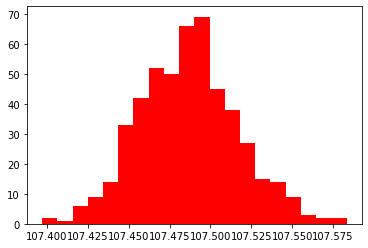

In [15]:
# Taking heartrate and converting into an array
size = New_set['Heartrate']
hearts = np.array(size)

# Looping through a sample of 500 from heartrate, one at a time and find mean of each sample and storing in a list
# Use 30% of the array 
size_means = []
for x in range(1,500):
    size = np.random.choice(hearts, size = int(.30*len(hearts)),replace = False)
    size_means.append(np.mean(size))

# Calculating mean of sample means and heartrate mean
mean_of_samples_means = np.mean(size_means)
heartrate_mean = np.mean(hearts)

print(f'Mean of Sample means {mean_of_samples_means}')
print(f'Mean of heartrate {heartrate_mean}')

# Producing histogram
ax = sns.distplot(size_means,kde=False,color='red',hist_kws={'linewidth':15,'alpha':1})

Mean of Sample means 32.751269881140395
Mean of hand temperature 32.751257207757384


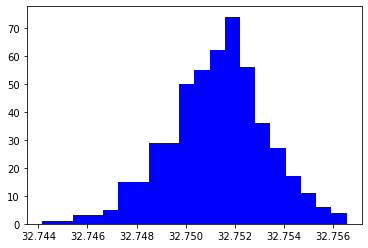

In [16]:
# Taking hand temperature and converting into an array
size = New_set['handTemperature']
handT = np.array(size)

# Looping through a sample of 500 from hand temperature, one at a time and find mean of each sample and storing in a list
# Use 30% of the array 
size_means = []
for x in range(1,500):
    size = np.random.choice(handT, size = int(.30*len(hearts)),replace = False)
    size_means.append(np.mean(size))

# Calculating mean of sample means and hand temperature mean
mean_of_samples_means = np.mean(size_means)
hand_temperature_mean = np.mean(handT)

print(f'Mean of Sample means {mean_of_samples_means}')
print(f'Mean of hand temperature {hand_temperature_mean}')

# Producing histogram
ax = sns.distplot(size_means,kde=False,color='blue',hist_kws={'linewidth':15,'alpha':1})

Mean of Sample means 33.7119106678194
Mean of ankle temperature 33.71194157090637


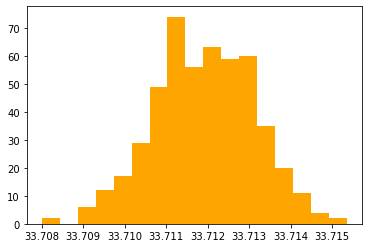

In [17]:
# Taking ankle temperature and converting into an array
size = New_set['ankleTemperature']
ankleT = np.array(size)

# Looping through a sample of 500 from ankle temperature, one at a time and find mean of each sample and storing in a list
# Use 30% of the array 
size_means = []
for x in range(1,500):
    size = np.random.choice(ankleT, size = int(.30*len(hearts)),replace = False)
    size_means.append(np.mean(size))

# Calculating mean of sample means and ankle temperature mean
mean_of_samples_means = np.mean(size_means)
ankle_temperature_mean = np.mean(ankleT)

print(f'Mean of Sample means {mean_of_samples_means}')
print(f'Mean of ankle temperature {ankle_temperature_mean}')

# Producing histogram
ax = sns.distplot(size_means,kde=False,color='orange',hist_kws={'linewidth':15,'alpha':1})

Mean of Sample means 36.17882370176874
Mean of chest temperature 36.17877622286985


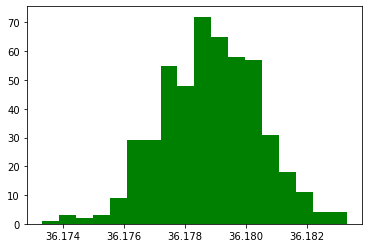

In [18]:
# Taking chest temperature and converting into an array
size = New_set['chestTemperature']
chestT = np.array(size)

# Looping through a sample of 500 from chest temperature, one at a time and find mean of each sample and storing in a list
# Use 30% of the array 
size_means = []
for x in range(1,500):
    size = np.random.choice(chestT, size = int(.30*len(hearts)),replace = False)
    size_means.append(np.mean(size))

# Calculating mean of sample means and chest temperature mean
mean_of_samples_means = np.mean(size_means)
chest_temperature_mean = np.mean(chestT)

print(f'Mean of Sample means {mean_of_samples_means}')
print(f'Mean of chest temperature {chest_temperature_mean}')

# Producing histogram
ax = sns.distplot(size_means,kde=False,color='green',hist_kws={'linewidth':15,'alpha':1})

# 5. Exploratory Data Analysis

In this section I am going to use graphs and plots to describe my data and to discover underlying trends among the data. Before I carry out my analysis I will split my data into development (training) data and test data to evaluate models, this way I can classifier how well my model can predict values from a set of data where I can measure precision and accuracy. I will split my data into 80% training data and 20% testing data as this will give a reasonalble balance in terms of variance for my data.

## Data Split

In [19]:
train_df, test_df = train_test_split(New_set, test_size = 0.2)

In [20]:
train_df.describe()

,Timestamp,Activity_ID,Heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,subject_id
count,1.554297e+06,1.554297e+06,1.554297e+06,1.554297e+06,1.554297e+06,1.554297e+06,1.554297e+06,1.554297e+06,1.554297e+06,1.554297e+06,...,1.554297e+06,1.554297e+06,1.554297e+06,1.554297e+06,1.554297e+06,1.554297e+06,1.554297e+06,1.554297e+06,1.554297e+06,1.554297e+06
mean,1.706090e+03,8.087201e+00,1.075122e+02,3.275082e+01,-4.958275e+00,3.585556e+00,3.600816e+00,-4.891576e+00,3.574801e+00,3.785121e+00,...,9.380442e+00,-4.337420e-02,-2.174775e+00,9.897555e-03,-3.640215e-02,7.060517e-03,-3.159290e+01,1.394438e+00,1.725086e+01,1.045667e+02
std,1.093350e+03,6.175932e+00,2.699944e+01,1.795243e+00,6.238524e+00,6.885101e+00,3.955696e+00,6.245564e+00,6.594969e+00,3.944587e+00,...,6.068825e+00,7.192656e+00,3.474358e+00,1.128204e+00,6.385388e-01,2.012877e+00,1.833512e+01,2.168611e+01,1.969306e+01,2.332826e+00
min,3.120000e+01,1.000000e+00,5.700000e+01,2.487500e+01,-1.069570e+02,-1.043010e+02,-1.014520e+02,-6.119380e+01,-6.184170e+01,-6.193470e+01,...,-6.114200e+01,-6.190350e+01,-6.228930e+01,-2.399500e+01,-1.812690e+01,-1.401960e+01,-1.728650e+02,-1.379080e+02,-1.027160e+02,1.010000e+02
25%,7.457200e+02,3.000000e+00,8.600000e+01,3.168750e+01,-8.970660e+00,1.058840e+00,1.161430e+00,-8.867880e+00,1.058930e+00,1.362120e+00,...,8.403220e+00,-2.073650e+00,-3.398630e+00,-2.087520e-01,-1.067760e-01,-4.411650e-01,-4.171430e+01,-1.250220e+01,3.813420e+00,1.020000e+02
50%,1.481600e+03,6.000000e+00,1.044545e+02,3.312500e+01,-5.456180e+00,3.527330e+00,3.431810e+00,-5.384150e+00,3.568720e+00,3.661520e+00,...,9.551750e+00,-2.253350e-01,-1.990570e+00,4.652200e-03,-3.944030e-03,-2.328520e-03,-3.401570e+01,7.745720e-01,1.876130e+01,1.050000e+02
75%,2.664320e+03,1.300000e+01,1.240000e+02,3.406250e+01,-9.649760e-01,6.454520e+00,6.531150e+00,-9.119730e-01,6.458610e+00,6.775770e+00,...,1.028570e+01,1.920080e+00,-5.936160e-01,1.319050e-01,1.167260e-01,9.246360e-02,-1.791830e+01,1.782910e+01,3.120110e+01,1.070000e+02
max,4.245680e+03,2.400000e+01,2.020000e+02,3.550000e+01,6.285960e+01,1.555260e+02,1.411000e+02,5.282140e+01,6.225980e+01,6.192340e+01,...,6.196930e+01,6.204900e+01,5.721300e+01,1.742040e+01,1.358820e+01,1.652880e+01,9.155160e+01,9.369920e+01,1.469000e+02,1.090000e+02


## 5.1  Subjects Key Information

In [21]:
# Dataframe showing all information on subjects

data = {'Subject ID':  [101,102,103,104,105,106,107,108,109],
        'Sex': ['M','F','M','M','M','M','M','M','M',],
       'Age (years)': [27,25,31,24,26,26,23,32,31],
        'Height (cm)': [182,169,187,194,180,183,173,179,168],
       'Weight (Kg)': [83,78,92,95,73,69,86,87,65],
       'Resting HR (bpm)':[75,74,68,58,70,60,60,66,54],
       'Max HR (bpm)': [193,195,189,196,194,194,197,188,189],
       'Dominant Hand': ['right','right','right','right','right','right','right','left','right']}

subj_inf = pd.DataFrame(data)
subj_inf

,Subject ID,Sex,Age (years),Height (cm),Weight (Kg),Resting HR (bpm),Max HR (bpm),Dominant Hand
0,101,M,27,182,83,75,193,right
1,102,F,25,169,78,74,195,right
2,103,M,31,187,92,68,189,right
3,104,M,24,194,95,58,196,right
4,105,M,26,180,73,70,194,right
5,106,M,26,183,69,60,194,right
6,107,M,23,173,86,60,197,right
7,108,M,32,179,87,66,188,left
8,109,M,31,168,65,54,189,right


In [22]:
# Dataframe showing activities subjects participated in

data1 = {'Activity':['1',
        '2',
        '3',
        '4',
        '5',
        '6',
        '7',
        '9',
        '10', '11',
        '12', '13', '16', '17',
        '18', '19', '20',
        '24'],
         '101': [1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1],
         '102': [1,1,1,1,1,1,1,0,0,0,1,1,1,1,0,0,0,1],
         '103': [1,1,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0],
         '104': [1,1,1,1,0,1,1,0,0,0,1,1,1,1,0,0,0,0],
         '105': [1,1,1,1,1,1,1,0,1,0,1,1,1,1,0,1,0,1],
         '106': [1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,0,1],
         '107': [1,1,1,1,1,1,1,0,0,0,1,1,1,1,0,0,0,0],
         '108': [1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1],
         '109': [0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1],
         'Total Subjects': [8,8,8,8,6,7,7,1,4,1,8,8,8,8,4,5,2,6]
        }

act_inf = pd.DataFrame(data1)
act_inf

,Activity,101,102,103,104,105,106,107,108,109,Total Subjects
0,1,1,1,1,1,1,1,1,1,0,8
1,2,1,1,1,1,1,1,1,1,0,8
2,3,1,1,1,1,1,1,1,1,0,8
3,4,1,1,1,1,1,1,1,1,0,8
4,5,1,1,0,0,1,1,1,1,0,6
5,6,1,1,0,1,1,1,1,1,0,7
6,7,1,1,0,1,1,1,1,1,0,7
7,9,1,0,0,0,0,0,0,0,0,1
8,10,0,0,0,0,1,1,0,1,1,4
9,11,1,0,0,0,0,0,0,0,0,1


Text(0, 0.5, 'Total Subjects')

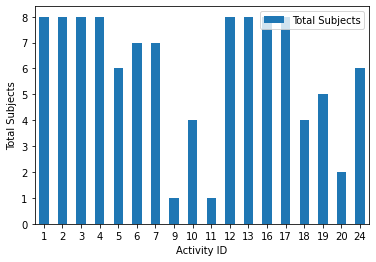

In [23]:
ax = act_inf.plot.bar(x='Activity', y='Total Subjects', rot=0) 
ax.set_xlabel('Activity ID')
ax.set_ylabel('Total Subjects')

This dataframe shows that all the activities and the subjects that participated with the total number of subjects for each activity. We can comprehend why there is a vast range in the number of data points collected in the next graphs due to a lack of diversification among the number of activites the subjects carried out. Activties 9, 11 and 20(watching_TV,car driving,playing_soccer) have the least amount where most activities are fairly balanced.

## 5.2  Subject-ID Datapoints

In [24]:
# Function used to create a bar chart that takes a dataframe and also columns of the dataframes

def graph_it(dataf,column_1,column_2,title,xlabels,ylabels,figsize=(10,7)):
    size = range(len(dataf))
    f, ax = plt.subplots(figsize=figsize) 
    plt.bar(size, dataf[column_1], color=plt.cm.Paired(size))
    ax.set_xticklabels(dataf[column_2])
    ax.set_xticks(np.arange(len(dataf)))
    ax.set_title(title)
    ax.set_xlabel(xlabels)
    ax.set_ylabel(ylabels)
    plt.show()

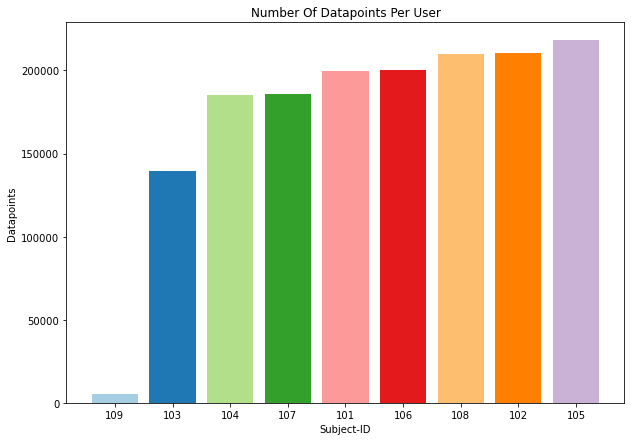

In [25]:
# Producing a graph that shows the number of data points for each subject in ascending order from left to right

datapoints = train_df.groupby(['subject_id']).count().reset_index()
datapoints_df = pd.DataFrame()
datapoints_df['subject_id'] = datapoints['subject_id']
datapoints_df['samples'] = datapoints['Activity_ID']
datapoints_df = datapoints_df.sort_values(by=['samples'])
graph_it(datapoints_df,'samples','subject_id','Number Of Datapoints Per User','Subject-ID','Datapoints')

From this graph we can see that subject has 109 has the least datapoints, on the contrary subject 105 has the highest number of datapoints in the overall set. So there seems to be a large range between the number of datapoints for subjects although from the graph subjects 104 - 102 seem to be fairly consistent and fairly even in weight. Therefore, comparing subjects with a vast difference in the number of data points may not lead to reliable conclusions as the classess are not balanced.

## 5.3  Activitiy Datapoints

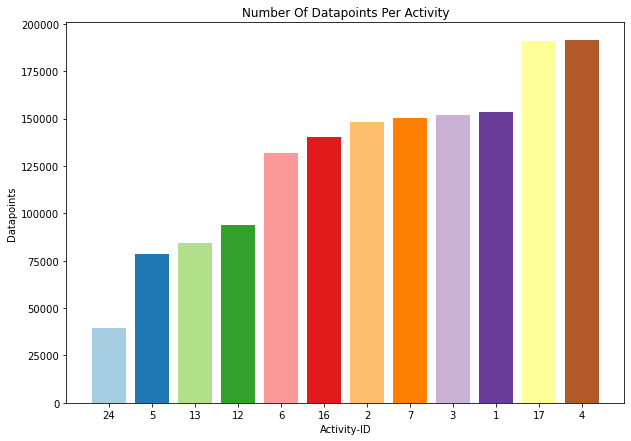

In [26]:
# Producing a graph that shows the number of data points for each activity in ascending order from left to right

acts = train_df.groupby(['Activity_ID']).count().reset_index()
acts_df = pd.DataFrame()
acts_df['Activity_ID'] = acts['Activity_ID']
acts_df['acts'] = acts['Timestamp'] # Assign number of rows, I could've used any column for this other than Timestamp
acts_df = acts_df.sort_values(by=['acts'])
graph_it(acts_df,'acts','Activity_ID','Number Of Datapoints Per Activity','Activity-ID','Datapoints')

From this graph we can see that my data isn't very balanced and includes are large range between the number of datapoints. Activity 4 (Walking) has the highest number of datapoints where as activity 24 (Rope Jumping) has the lowest number of datapoints indicating my analysis may not be accurately representative of this activity. Activities 16, 2, 7, 3, 1 all are faily even in weighting. Similar to the previous graph the datapoints of the activities aren't balanced.

## 5.4 Heartrate vs Activities

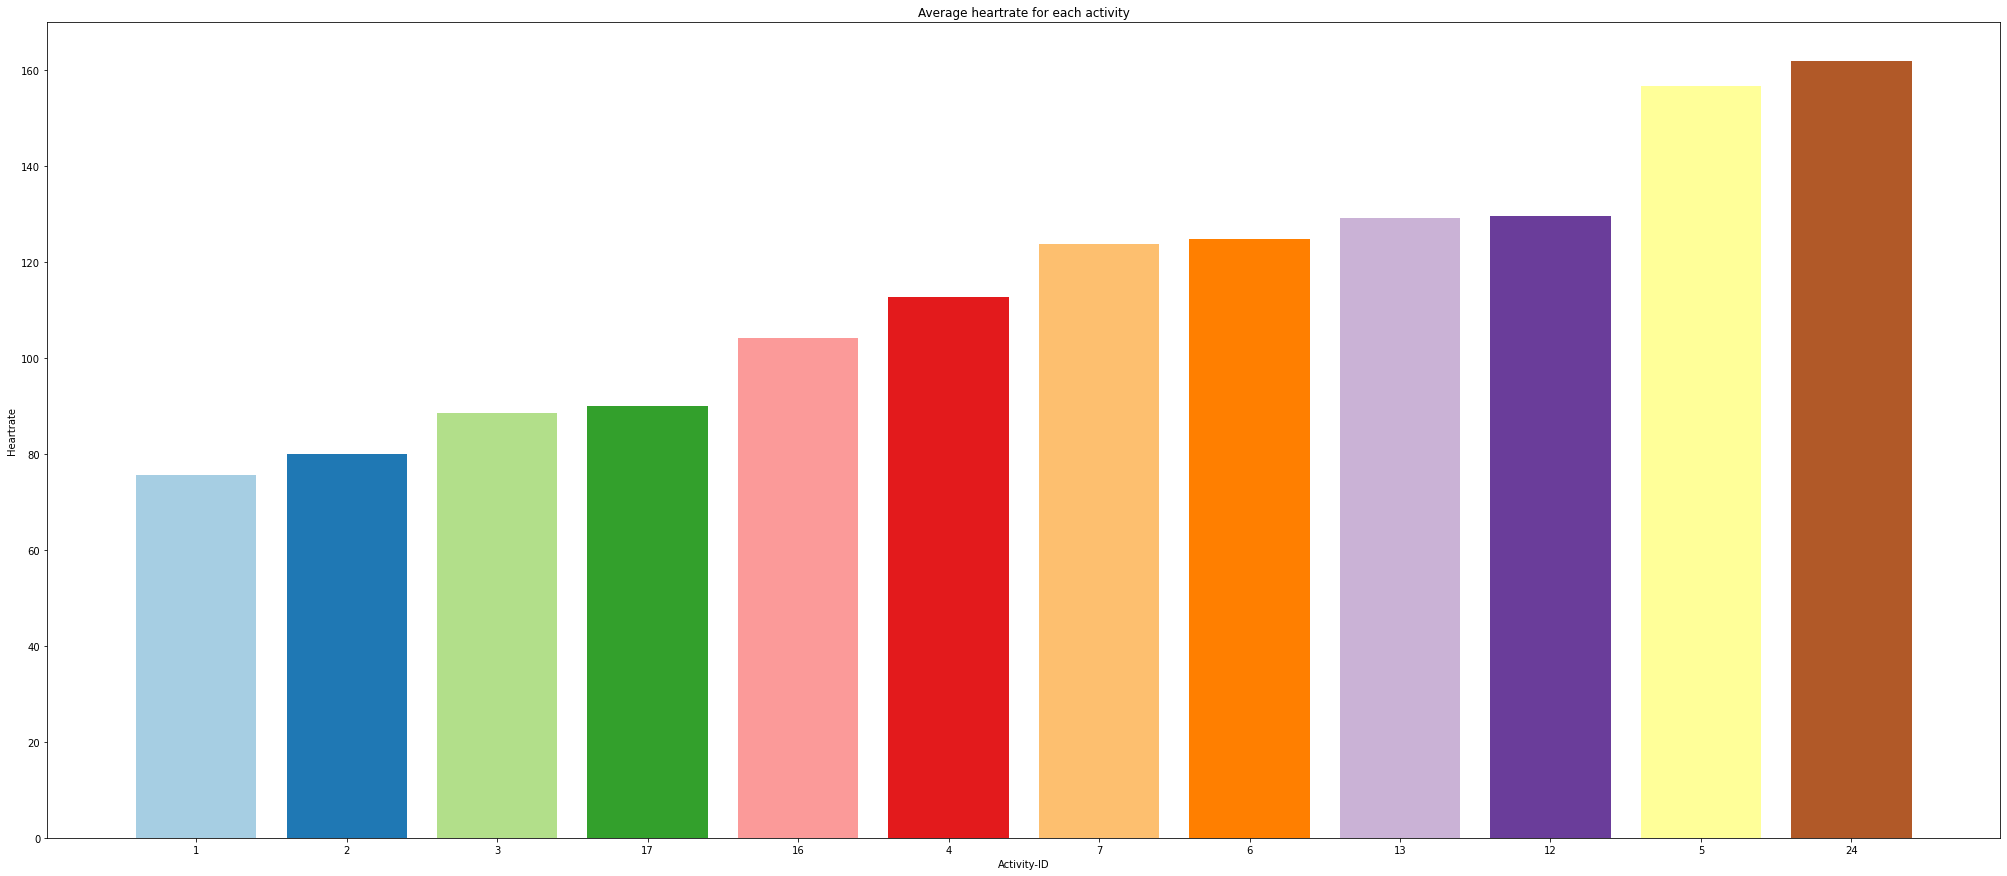

In [27]:
# Producing a graph that shows the average heart rate for each activity in ascending order from left to right

herate = train_df.groupby(['Activity_ID']).mean().reset_index()
heart_df = pd.DataFrame()
heart_df['Activity_ID'] = [i for i in herate['Activity_ID']]
heart_df['Heartrate'] = herate['Heartrate']
heart_df = heart_df.sort_values(by=['Heartrate'])
graph_it(heart_df,'Heartrate','Activity_ID','Average heartrate for each activity','Activity-ID','Heartrate',figsize=(35,15))

From this graph we can see that Rope Jumping had the highest average heartrate at 161.99 where as lying had the lowest
heartrate at 75.54. Therefore, the average range is 86.54. We will be mainly focusing on heart rate measurements when considering our development given that it's the most precise unit of measurement that can determine the amount and type of physical activity carried out.

## 5.5 Body Part Temperatures vs Activities

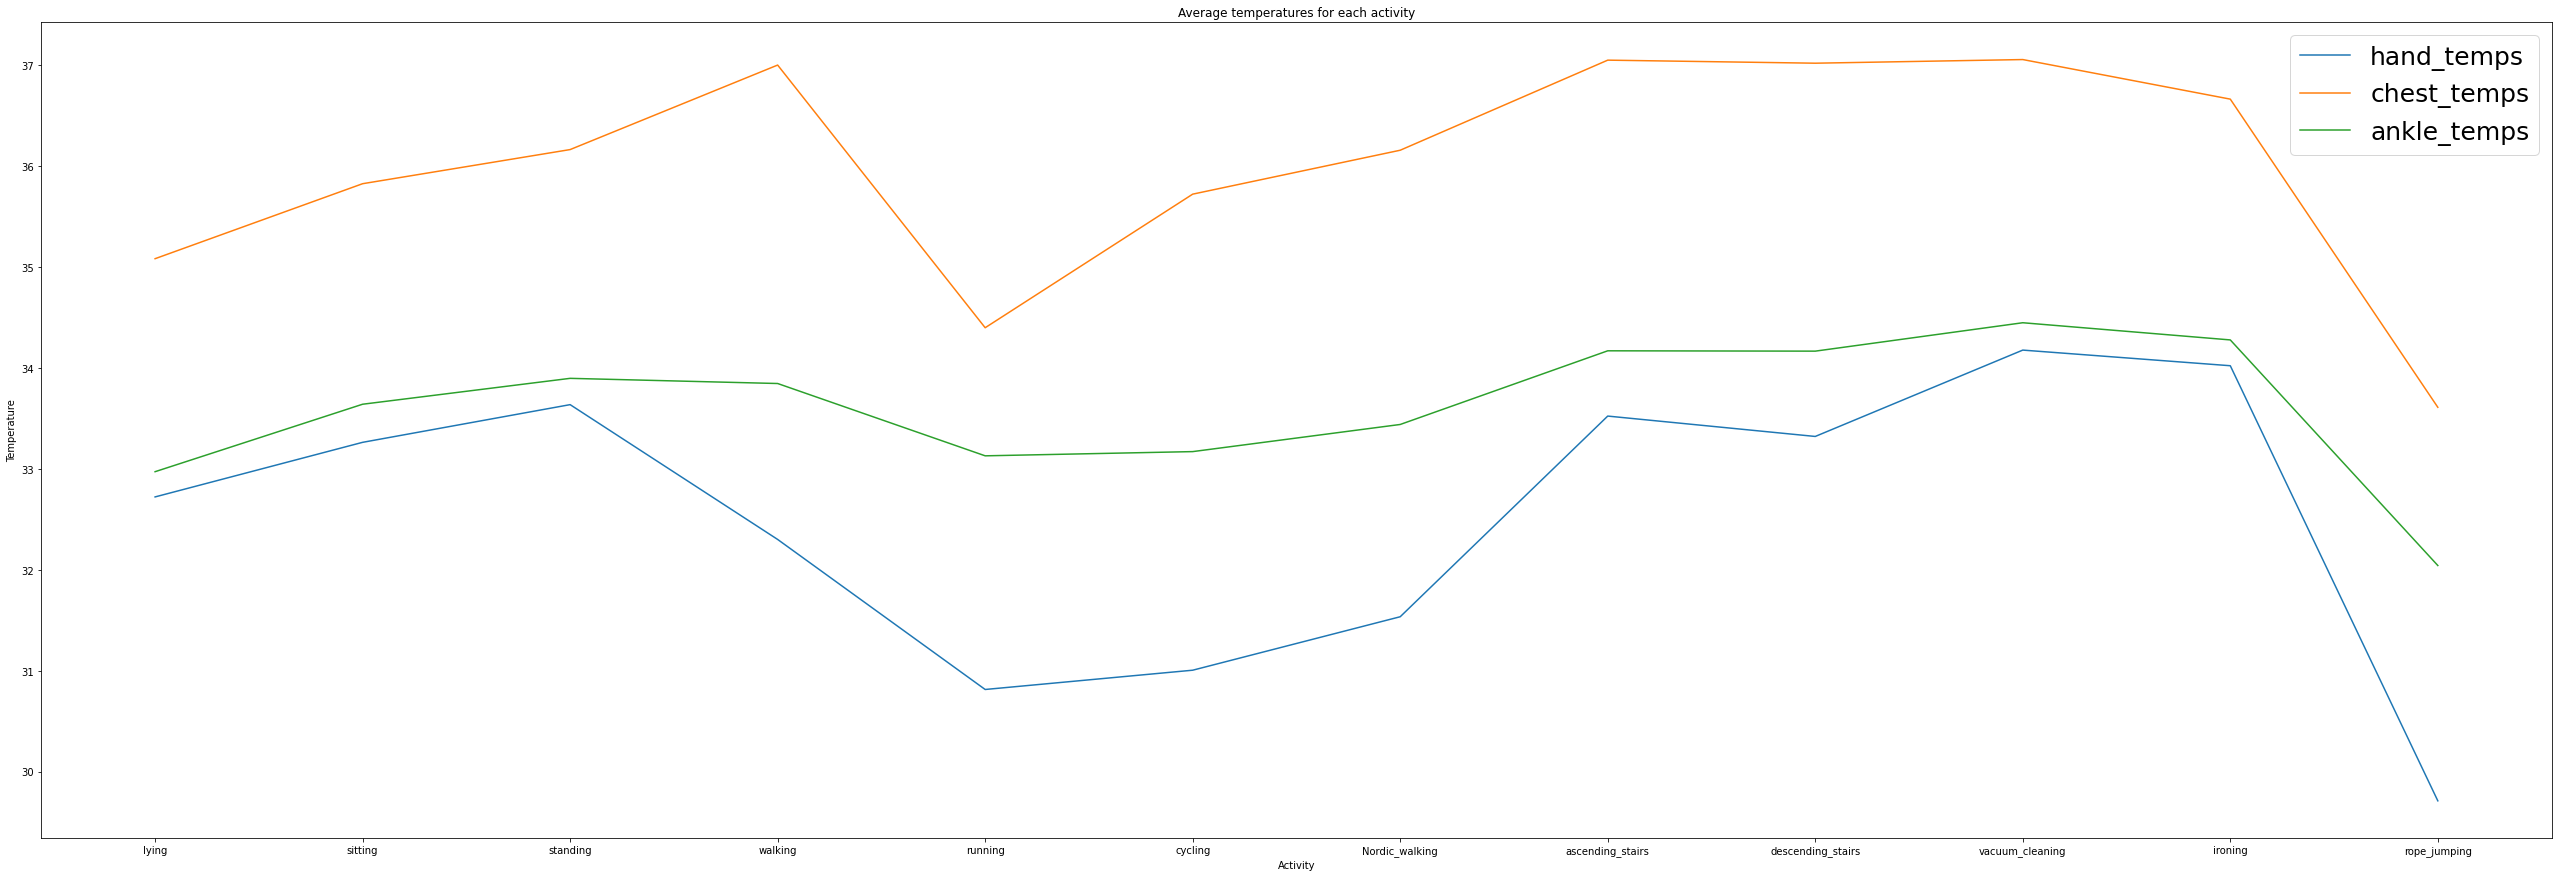

In [28]:
# Producing a line graph of the various temperatures of the body parts with their respective activity 

temps = train_df.groupby(['Activity_ID']).mean().reset_index()
tempers_df = pd.DataFrame()
tempers_df['Activity_ID'] = [Acts_ID[i] for i in temps['Activity_ID']]
tempers_df['hand_temps'] = temps['handTemperature']
tempers_df['chest_temps'] = temps['chestTemperature']
tempers_df['ankle_temps'] = temps['ankleTemperature']

ax = tempers_df.plot(kind = 'line', figsize = (45,15), title = 'Average temperatures for each activity')
ax.set_xlabel('Activity')
ax.set_ylabel('Temperature')
ax.set_xticklabels(tempers_df['Activity_ID'])
s = ax.legend(fontsize = 25)
t = ax.set_xticks(np.arange(len(tempers_df)))

The graph displayed shows the fluctuations in the average temperature over all activities. Its evident that the chest measurements produced the most heat for every activity followed by ankle then hand. Rope Jumping produced the least heat for all body parts although there tends to be many differentiations between temperature for the same activity with different body parts. As for the highest temperatures produced, for chest is ascending stairs and vacuum cleaning for both hand and ankle  with ascending stairs following after in both cases. Next we will compare the temperature against the individual subjects and activities to consider whether temperature is related to the actual activity itseld or their is an external factor.

## 5.6 Subjects vs Temperature

In [29]:
def Heatmap(df, title, xlabel, ylabel, xticks, yticks, showcbar=True, showannot=False):
    
    mycmap = LinearSegmentedColormap.from_list('mycmap', ['red', 'green'])
    fig = plt.figure(figsize=(6,6))
    ax = fig.gca()
    sns.heatmap(df, cmap = mycmap, yticklabels=yticks, xticklabels=xticks, square=True,\
                    linewidths=0.1, cbar=showcbar, annot=showannot,fmt='.1f')
    t = ax.set_ylabel(ylabel)
    r = ax.set_xlabel(xlabel)
    p = ax.set_title(title)

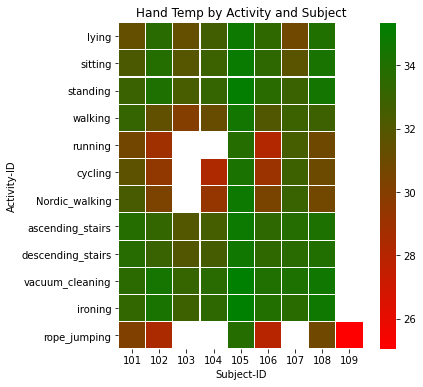

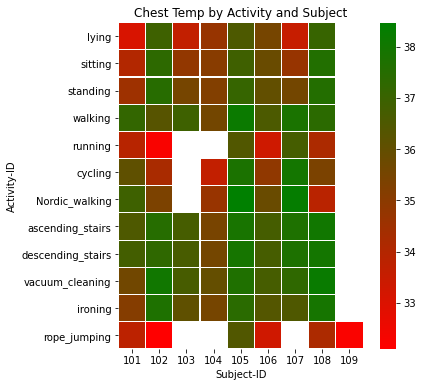

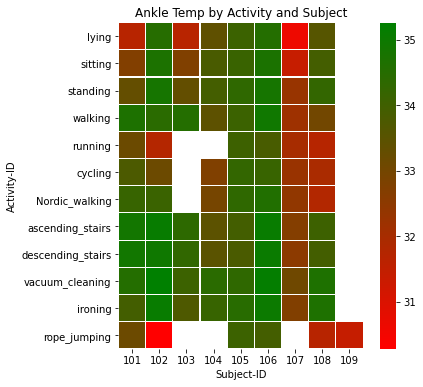

In [30]:
# Setting x,y labels and individuals ticks along the axes

xticks = [101,102,103,104,105,106,107,108,109]   
yticks = [j for i, j in Acts_ID.items() if i in Proto_activities]
xlabel = 'Subject-ID'
ylabel = 'Activity-ID'

# Heatmap of the hand temperature against activity and subject

title = 'Hand Temp by Activity and Subject'
df = train_df.groupby(['Activity_ID','subject_id'], as_index=False).mean()[['Activity_ID','subject_id','handTemperature']].pivot(index='Activity_ID', columns='subject_id', values='handTemperature')
Heatmap(df, title, xlabel, ylabel, xticks, yticks)

# Heatmap of the chest temperature against activity and subject

title = 'Chest Temp by Activity and Subject'
df = train_df.groupby(['Activity_ID','subject_id'], as_index=False).mean()[['Activity_ID','subject_id','chestTemperature']].pivot(index='Activity_ID', columns='subject_id', values='chestTemperature')
Heatmap(df, title, xlabel, ylabel, xticks, yticks)

# Heatmap of the ankle temperature against activity and subject

title = 'Ankle Temp by Activity and Subject'
df = train_df.groupby(['Activity_ID','subject_id'], as_index=False).mean()[['Activity_ID','subject_id','ankleTemperature']].pivot(index='Activity_ID', columns='subject_id', values='ankleTemperature')
Heatmap(df, title, xlabel, ylabel, xticks, yticks)

In these graphs we can see a comparison of temperature against the subjects and the respective activities carried out. The greener patches show a higher temperature, so we notice from hand temperatures are far higher than ankle and chest temperatures even for the same activity so maybe the positioning of the sensor has an affect on the temperature which may not seem too logical. Perhaps the values are more reliant on the subjets themselves because many of the subjets such as 105 and 109 show similar heatmaps across all 3 body parts. In terms of identifying the activity from the temperatures, it's  quite difficult due to the fact there is no consistency of each activity across all 3 body parts furthering the point that the temperatures are maybe more dependant on the subject. 

## 5.7 Intensity vs Heartrate

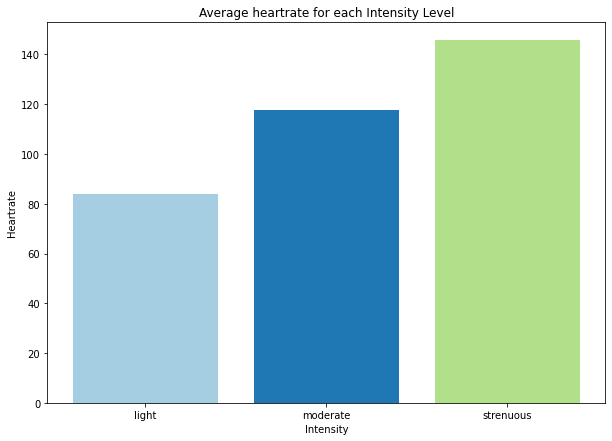

In [31]:
# Producing a graph that shows the average heart rate vs intensity levels

ins = train_df.groupby(['Intensity']).mean().reset_index()
ins_df = pd.DataFrame()
ins_df['Intensity'] = ins['Intensity']
ins_df['Heartrate'] = ins['Heartrate']
ins_df = ins_df.sort_values(by=['Heartrate'])
graph_it(ins_df,'Heartrate','Intensity','Average heartrate for each Intensity Level','Intensity','Heartrate')

Previously I separated the activities into lists consisting of groups differing by the intensity of the activity. To compare the intensities I have produced a bar chart showing the average heart rates of each intensity. We can observe that the light activities had the smallest heart rate of 83.93 with moderate and strenuous having consecutive higher heart rates with 116.02 & 137.67 respectively. Therefore, we can see that heartrate changes with the different intensities which is plausible as there is less motion involved in the activities with lower intensity. This indicates that heart rate is influenced by the activity completed.

## 5.8 Box Plot (Heart rate vs Subject)

,Activity,101,102,103,104,105,106,107,108,109,Total Subjects
0,1,1,1,1,1,1,1,1,1,0,8
1,2,1,1,1,1,1,1,1,1,0,8
2,3,1,1,1,1,1,1,1,1,0,8
3,4,1,1,1,1,1,1,1,1,0,8
4,5,1,1,0,0,1,1,1,1,0,6
5,6,1,1,0,1,1,1,1,1,0,7
6,7,1,1,0,1,1,1,1,1,0,7
7,9,1,0,0,0,0,0,0,0,0,1
8,10,0,0,0,0,1,1,0,1,1,4
9,11,1,0,0,0,0,0,0,0,0,1


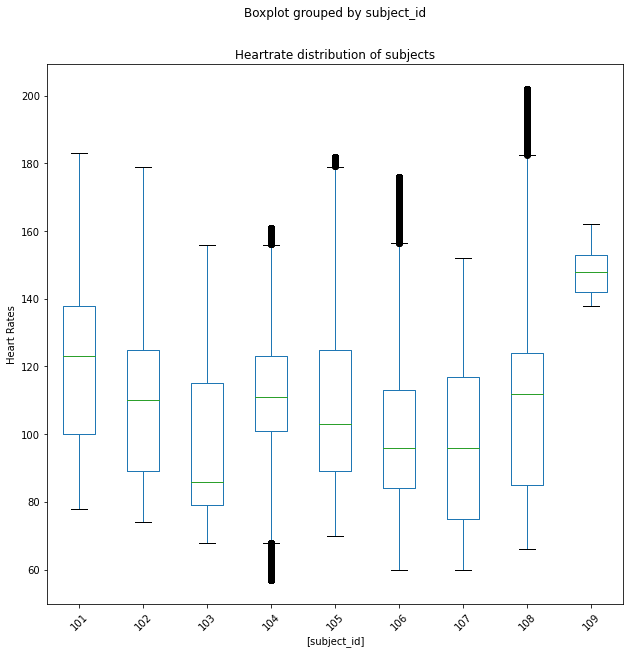

In [32]:
# Lock subject_id and Heartrate columns
heart = train_df.loc[:,['subject_id','Heartrate']].groupby('subject_id')

# Counts Heartrate column
heart_counts = heart.count().reset_index('subject_id')
heart_counts = heart_counts.sort_values('Heartrate', ascending=False)

# Isolate subjec_id column to see subjects only
heart_x_sub  = heart_counts['subject_id']

# Display all values of subject_id and heartrate
all_heart_df = train_df[train_df.subject_id.isin(heart_x_sub)].loc[:,['subject_id','Heartrate']]

# Produce box plots comparing heart rates of each subject
ax = all_heart_df.boxplot(by='subject_id',figsize=(10,10), rot=45, grid=False)
ax.set_ylabel("Heart Rates")
ax.set_title('Heartrate distribution of subjects')

act_inf

I separated the 9 subjects via their heart rate datapoints into box plots to see the distributions of heart rates across all the activities completed. The mean heart rate across all datapoints comes to 107.49 beats per minute (bpm). The black lines show the outliers in subjects 104, 105, 106 and 108 with subject 104 having outliers on boths sides of the minimum and maximum points. Most box plots look fairly symmetric but subject 103 has a relativiely lower median compared to other subjects this may due to subject 103 taking part in fairly light activities as we can observe from the above dataframe. Not 1 exercise was carried out by all subjects which creates a sense of bias when comparing average heartrates as there could be high variation in the heart rates for more active exercises which I will later investigate in my hypothesis testing. For instance, Subject 109 possesses a higher average heart rate than subject 103 potentially being involved in more active exercises which could entail a higher heart rate, yet subject 109 does have fewer datapoints so it could've had more variation leading to a thicker box plot.

## 5.9 Correlation matrix

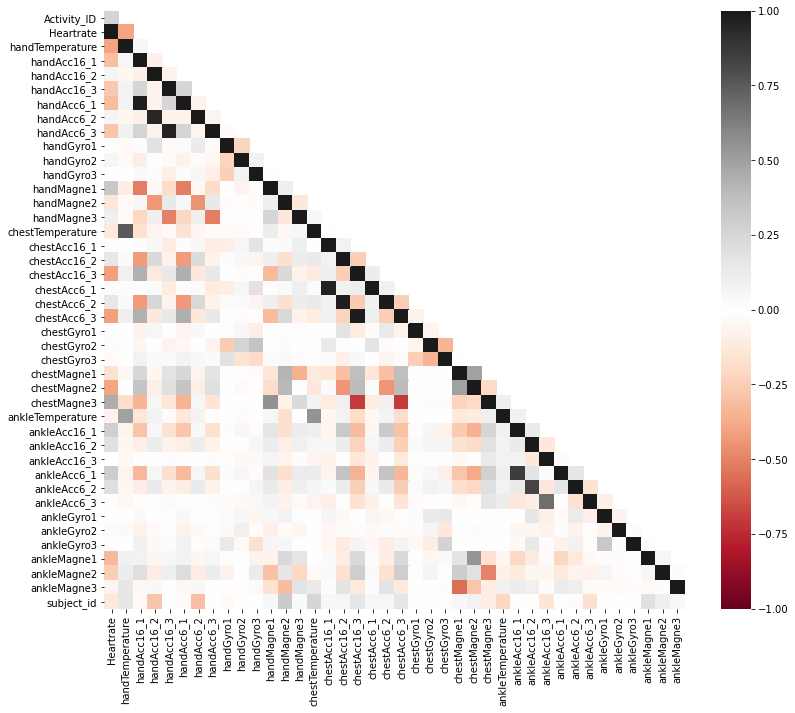

In [33]:
df_corr = train_df.corr()
df_corr = df_corr.drop(['Activity_ID','Timestamp'], axis = 1)

fig, ax = plt.subplots(figsize=(13, 11))

# mask
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))

# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()

# plot heatmap
sns.heatmap(corr, mask=mask, annot=False, cmap='RdGy', vmin=-1, vmax=1)

# yticks
plt.yticks(rotation=0)
plt.show()

From the correlation matrix above we can observe that the graph has many white patches showing there are variables that have no correlation between them and not worth investigating further, however noticing slightly darker areas such as  the chest magnetometers seem quite positively correlated with heartrate which is sensible given that they are in close proximity of each other. Furthermore, there also seems to be a strong correlation between chest magnetometer and the handmagnetometer.

In addition, the body temperatures of hand, chest, and ankle are all strongly correlated as a temperature rise affects the entire body although it's uncertain which body part is normally the warmest. 

There also seems to be a strongly negative correlation between hand magnetometer and both types of hand acceleration measurements (6g and 16g) which is logical as magnetometer are used to determine geographical location.

## 5.10 Accelerometer Sensor

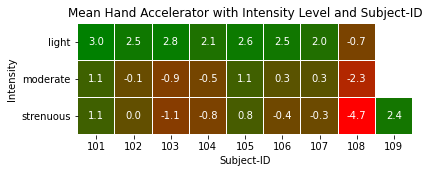

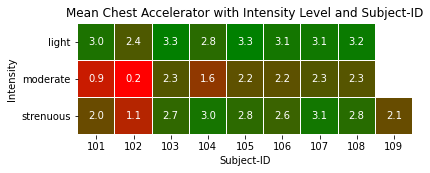

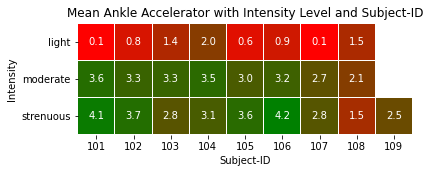

In [34]:
# Heatmaps of the accelerometer sensor at each body part compared with the intensity of the activity and subject

xticks = [101,102,103,104,105,106,107,108,109]   
yticks = ['light','moderate','strenuous']
xlabel = 'Subject-ID'
ylabel = 'Intensity'

# The hand accelerometer compared with Intensity and Subject ID

accelh_df = pd.DataFrame()
accelh_df['Intensity'] = train_df['Intensity']
accelh_df['subject_id'] = train_df['subject_id']
accelh_df['handAcc16_123'] = (train_df['handAcc16_1']+train_df['handAcc16_2']+train_df['handAcc16_3'])/3
accelerator_hand = accelh_df.groupby(['Intensity','subject_id'], as_index=False).mean()[['Intensity','subject_id','handAcc16_123']].pivot(index='Intensity', columns='subject_id', values='handAcc16_123')
title = 'Mean Hand Accelerator with Intensity Level and Subject-ID'
Heatmap(accelerator_hand,title, xlabel, ylabel, xticks, yticks,showcbar=False, showannot=True)

# The chest aaccelerometer compared with Intensity and Subject ID

accelc_df = pd.DataFrame()
accelc_df['Intensity'] = train_df['Intensity']
accelc_df['subject_id'] = train_df['subject_id']
accelc_df['chestAcc16_123'] = (train_df['chestAcc16_1']+train_df['chestAcc16_2']+train_df['chestAcc16_3'])/3
accelerator_chest = accelc_df.groupby(['Intensity','subject_id'], as_index=False).mean()[['Intensity','subject_id','chestAcc16_123']].pivot(index='Intensity', columns='subject_id', values='chestAcc16_123')
title = 'Mean Chest Accelerator with Intensity Level and Subject-ID'
Heatmap(accelerator_chest,title, xlabel, ylabel, xticks, yticks,showcbar=False, showannot=True)

# The ankle accelerometer compared with Intensity and Subject ID

accelank_df = pd.DataFrame()
accelank_df['Intensity'] = train_df['Intensity']
accelank_df['subject_id'] = train_df['subject_id']
accelank_df['ankleAcc16_123'] = (train_df['ankleAcc16_1']+train_df['ankleAcc16_2']+train_df['ankleAcc16_3'])/3
accelerator_ankle = accelank_df.groupby(['Intensity','subject_id'], as_index=False).mean()[['Intensity','subject_id','ankleAcc16_123']].pivot(index='Intensity', columns='subject_id', values='ankleAcc16_123')
title = 'Mean Ankle Accelerator with Intensity Level and Subject-ID'
Heatmap(accelerator_ankle,title, xlabel, ylabel, xticks, yticks,showcbar=False, showannot=True)

I have specifically used the first accelerometer with a scale 0f 16g and excluded the scale with 6g given that from the readme.pdf the accelerometer became saturated due to high impacts from activities. I have calculated the average acceleration for each subject and categorised them into one of the groups of intensity level. The different cpolour corresponds to the value of the average mean accelerometer so from red to green shows the value increasing. We notice some variation across the intensity levels, for example in the mean hand accelerometer heatmap, light activites tend to have a higher mean with moderate activities having the lowest of all 3 suggesting more hand movement is used during these activities. This is also a similar case with mean chest accelerometer, however this trend deviates in the mean ankle accelerometer because the strenuous intensity has many values over 3, this is understandable because strenuous activities include exercises such as running, cycling, ascending stairs, rope jumping which involves a lot of leg movement so as a result would seem to give higher ankle acceleration.

## 5.11 Gyroscope Sensor

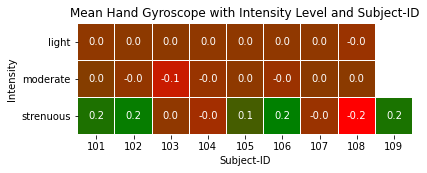

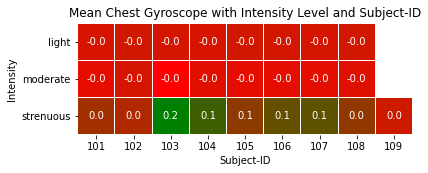

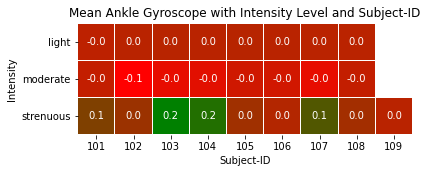

In [35]:
# Heatmaps of the Gyroscope sensor at each body part compared with the intensity of the activity and subject

xticks = [101,102,103,104,105,106,107,108,109]   
yticks = ['light','moderate','strenuous']
xlabel = 'Subject-ID'
ylabel = 'Intensity'

# The hand Gyroscope compared with Intensity and Subject ID

gyroh_df = pd.DataFrame()
gyroh_df['Intensity'] = train_df['Intensity']
gyroh_df['subject_id'] = train_df['subject_id']
gyroh_df['handGyro123'] = (train_df['handGyro1']+train_df['handGyro2']+train_df['handGyro3'])/3
gyroscope_hand = gyroh_df.groupby(['Intensity','subject_id'], as_index=False).mean()[['Intensity','subject_id','handGyro123']].pivot(index='Intensity', columns='subject_id', values='handGyro123')
title = 'Mean Hand Gyroscope with Intensity Level and Subject-ID'
Heatmap(gyroscope_hand,title, xlabel, ylabel, xticks, yticks,showcbar=False, showannot=True)

# The chest Gyroscope compared with Intensity and Subject ID

gyroc_df = pd.DataFrame()
gyroc_df['Intensity'] = train_df['Intensity']
gyroc_df['subject_id'] = train_df['subject_id']
gyroc_df['chestGyro123'] = (train_df['chestGyro1']+train_df['chestGyro2']+train_df['chestGyro3'])/3
Gyroscope_chest = gyroc_df.groupby(['Intensity','subject_id'], as_index=False).mean()[['Intensity','subject_id','chestGyro123']].pivot(index='Intensity', columns='subject_id', values='chestGyro123')
title = 'Mean Chest Gyroscope with Intensity Level and Subject-ID'
Heatmap(Gyroscope_chest,title, xlabel, ylabel, xticks, yticks,showcbar=False, showannot=True)

# The ankle Gyroscope compared with Intensity and Subject ID

Gyroscopea_df = pd.DataFrame()
Gyroscopea_df['Intensity'] = train_df['Intensity']
Gyroscopea_df['subject_id'] = train_df['subject_id']
Gyroscopea_df['ankleGyro123'] = (train_df['ankleGyro1']+train_df['ankleGyro2']+train_df['ankleGyro3'])/3
Gyroscope_ankle = Gyroscopea_df.groupby(['Intensity','subject_id'], as_index=False).mean()[['Intensity','subject_id','ankleGyro123']].pivot(index='Intensity', columns='subject_id', values='ankleGyro123')
title = 'Mean Ankle Gyroscope with Intensity Level and Subject-ID'
Heatmap(Gyroscope_ankle,title, xlabel, ylabel, xticks, yticks,showcbar=False, showannot=True)

In a similar manner I produced heatmaps to show the relationship between the intensity levels with the subjects and also the mean gyroscope measure for each body parts. Furthermore, we can see most values come to 0 or around this value sa the gyroscope is a measuremeent of angkle and may not be usefuly for determining what activity is currently being performed not give a useful physcial analysis of a persons physcial activity. 

## 5.12 Magnetometer Sensor

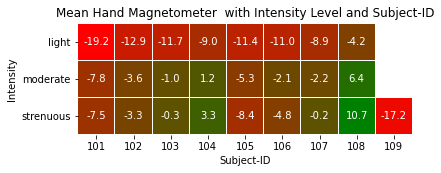

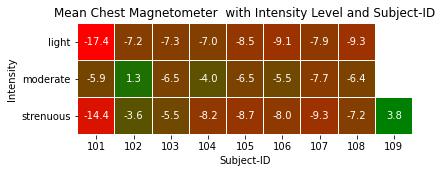

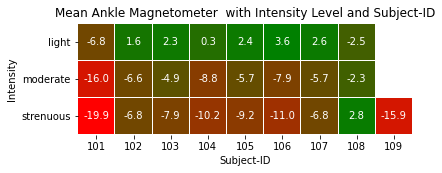

In [36]:
# Heatmaps of the Magnetometer sensor at each body part compared with the intensity of the activity and subject

xticks = [101,102,103,104,105,106,107,108,109]   
yticks = ['light','moderate','strenuous']
xlabel = 'Subject-ID'
ylabel = 'Intensity' 

# The hand Magnetometer compared with Intensity and Subject ID

magneth_df = pd.DataFrame()
magneth_df['Intensity'] = train_df['Intensity']
magneth_df['subject_id'] = train_df['subject_id']
magneth_df['handMagne123'] = (train_df['handMagne1']+train_df['handMagne2']+train_df['handMagne3'])/3
magnetometer_hand = magneth_df.groupby(['Intensity','subject_id'], as_index=False).mean()[['Intensity','subject_id','handMagne123']].pivot(index='Intensity', columns='subject_id', values='handMagne123')
title = 'Mean Hand Magnetometer  with Intensity Level and Subject-ID'
Heatmap(magnetometer_hand,title, xlabel, ylabel, xticks, yticks,showcbar=False, showannot=True)

# The chest Magnetometer compared with Intensity and Subject ID

magnetc_df = pd.DataFrame()
magnetc_df['Intensity'] = train_df['Intensity']
magnetc_df['subject_id'] = train_df['subject_id']
magnetc_df['chestMagne123'] = (train_df['chestMagne1']+train_df['chestMagne2']+train_df['chestMagne3'])/3
magnetometer_chest = magnetc_df.groupby(['Intensity','subject_id'], as_index=False).mean()[['Intensity','subject_id','chestMagne123']].pivot(index='Intensity', columns='subject_id', values='chestMagne123')
title = 'Mean Chest Magnetometer  with Intensity Level and Subject-ID'
Heatmap(magnetometer_chest,title, xlabel, ylabel, xticks, yticks,showcbar=False, showannot=True)

# The ankle Magnetometer compared with Intensity and Subject ID

magneta_df = pd.DataFrame()
magneta_df['Intensity'] = train_df['Intensity']
magneta_df['subject_id'] = train_df['subject_id']
magneta_df['ankleMagne123'] = (train_df['ankleMagne1']+train_df['ankleMagne2']+train_df['ankleMagne3'])/3
magnetometer_ankle = magneta_df.groupby(['Intensity','subject_id'], as_index=False).mean()[['Intensity','subject_id','ankleMagne123']].pivot(index='Intensity', columns='subject_id', values='ankleMagne123')
title = 'Mean Ankle Magnetometer  with Intensity Level and Subject-ID'
Heatmap(magnetometer_ankle,title, xlabel, ylabel, xticks, yticks,showcbar=False, showannot=True)

Finally we have the mean magnetometer compared with subject ID and Intensity level giving us varied values over different activity groups. Magnetometer  seem to have positive values for light activities in the ankle magnetometer but for other magnetometers in different body parts they remain mainly negative. Although, I can leave out investigating the magnetometer any further as it wont give any useful insight into the physical activity of an individual .

# 5.13 Heartrate vs Accelerometer

In [37]:
# Creat new data set with columns from training set

Newer = train_df.loc[:,['Heartrate','Activity_ID']]
Newer['Avg_HandAcc'] = (train_df['handAcc16_1']+train_df['handAcc16_2']+train_df['handAcc16_3'])/3
Newer['Avg_ChestAcc'] = (train_df['chestAcc16_1']+train_df['chestAcc16_2']+train_df['chestAcc16_3'])/3
Newer['Avg_AnkleAcc'] = (train_df['ankleAcc16_1']+train_df['ankleAcc16_2']+train_df['ankleAcc16_3'])/3
Newer

# Make a copy of Newer
df_tr = Newer

# Transsform the Activity_ID into dummies
df_tr = pd.get_dummies(df_tr, columns=['Activity_ID'])

# Standardize data
clmns = ['Heartrate','Avg_HandAcc','Avg_ChestAcc','Avg_AnkleAcc']

df_tr_std = stats.zscore(df_tr[clmns])

# Cluster the data
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_tr_std)
labels = kmeans.labels_

# Append back to original dataset 
df_tr['clusters'] = labels

# Add the column into clmns list
clmns.extend(['clusters'])

df_tr[clmns].groupby(['clusters']).mean()

,Heartrate,Avg_HandAcc,Avg_ChestAcc,Avg_AnkleAcc
clusters,,,,
0,130.586968,0.462753,0.134539,3.284040
1,85.800253,3.940923,3.152410,0.255397
2,106.973122,-1.523638,3.382124,2.946850


Text(29.62922526041666, 0.5, 'Avg_AnkletAcc')

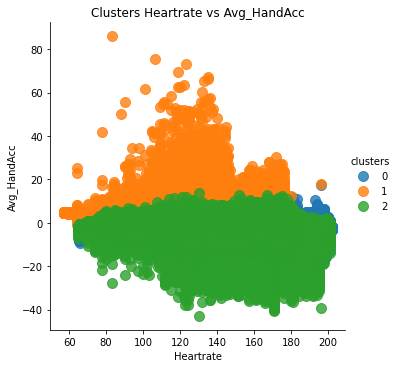

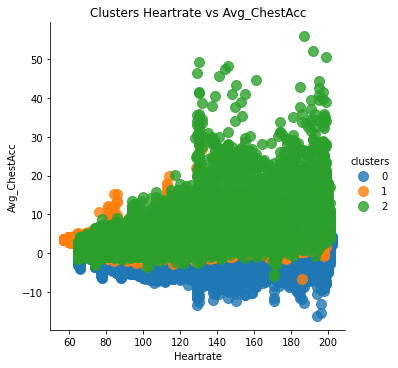

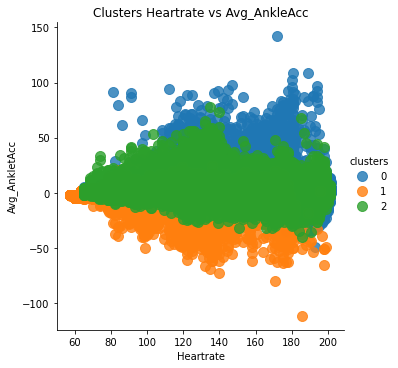

In [38]:
# Heartrate plotted against average accelerometer of the hand

sns.lmplot('Heartrate', 'Avg_HandAcc', 
           data=df_tr, 
           fit_reg=False, 
           hue="clusters",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('Clusters Heartrate vs Avg_HandAcc')
plt.xlabel('Heartrate')
plt.ylabel('Avg_HandAcc')

# Heartrate plotted against average accelerometer of the chest

sns.lmplot('Heartrate', 'Avg_ChestAcc', 
           data=df_tr, 
           fit_reg=False, 
           hue="clusters",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('Clusters Heartrate vs Avg_ChestAcc')
plt.xlabel('Heartrate')
plt.ylabel('Avg_ChestAcc')

# Heartrate plotted against average accelerometer of the ankle

sns.lmplot('Heartrate', 'Avg_AnkleAcc', 
           data=df_tr, 
           fit_reg=False, 
           hue="clusters",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('Clusters Heartrate vs Avg_AnkleAcc')
plt.xlabel('Heartrate')
plt.ylabel('Avg_AnkletAcc')

The clustering method above uses the average accelerometer value of hand, chest and ankle against heartrate given that the from the previous heatmaps I noticed a trend and correlation between the accelerometers with the various intensities & subject IDs. We can see the mean values of each cluster in the dataframe above shows the means of heartrates compared to the respective accelerometer, though there isn't a distinct trend we can see that cluster 0 shows lower heartrate with higher acceleration for hand and chest suggesting these activities didnt involve too much leg movement and alternatively cluster 2 shows a higher value for ankle accelerometer meaning more activites with using your lower body were used, so we can infer that higher hearts tend to be associated with lower body movements. This is reflective from the graphs as from the first graph we see it consists heavily of cluster 0 spreading further up the graph and in the final graph shows cluster 2 spread out very far showing it has a large range over the ankle accelerometer.

# 6. Hypothesis Testing

### Null Hypothesis - H_0: Mean heart rate for strenuous activities is equal to the mean heart rate for light activities. 

### Alternative Hypothesis - H_1: Mean heart rate for strenuous activities is significantly larger than the mean heart rate for light activities. 

Previously I tested to see if the sample means are normally distributed using central limit theorem which I found to be true, therefore, the distributions for mean heartrates of light and strenuous activities will also be normal. In this segment of the hypothesis testing I will be using my test data to ensure the distribution is normal and carry out ttest on the data, given that it's independent. The purpose of this is to calculate a p-value and see if my null hypothesis is accepted or rejected.

In [39]:
# Function producing a distribution

def distribution_graph(inp,title):
    plt.figure()
    plt.title(title)
    ax = sns.distplot(inp)
    plt.axvline(np.mean(inp),color='k',linestyle='dashed',linewidth=5)
    _,max_ = plt.ylim()
    plt.text(inp.mean() + inp.mean() / 10, max_ - max_ / 10,'Mean:{:.2f}'.format(inp.mean()))
    return plt.figure

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

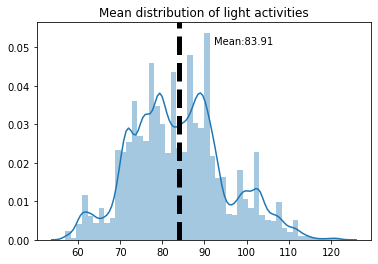

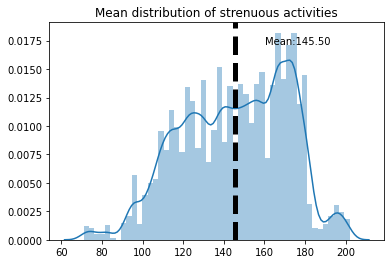

In [40]:
# Locking the Heartrate and Intensity columns together and slicing to get measurements of heartrate of 'light' only
 
light = test_df.loc[:,['Heartrate', 'Intensity']]
light1 = np.array(light.loc[light['Intensity'] == 'light']['Heartrate'])
distribution_graph(light1,'Mean distribution of light activities')

# Locking the Heartrate and Intensity columns together and slicing to get measurements of heartrate of 'strenuous' only

stren = test_df.loc[:,['Heartrate', 'Intensity']]
stren1 = np.array(stren.loc[stren['Intensity'] == 'strenuous']['Heartrate'])
distribution_graph(stren1,'Mean distribution of strenuous activities')

Also, evidently from the graphs we can see that light and strenuous activities are distributed relatively normally with light being more narrow and strenuous showing more variation. For my ttest I am going to be using an alpha value of 0.05 to compare to the p-value.

In [41]:
# Ttest on the sample means of light and strenuous activities

def ttest(array_1,array_2,alpha,sample_size):
    stat,p = ttest_ind(array_1,array_2)
    print('Statistics = %.3f, p = %.3f' % (stat,p))
    print('\n')
    if p > alpha:
        print('The mean heart rate for strenuous activities is equal to the mean heart rate for light activities, so we accept the null hypothesis')
    else:
        print('The mean heart rate for strenuous activities is significantly larger than the mean heart rate for light activities,  we reject the null hypothesis')

In [42]:
light_samp = np.random.choice(light1,10000)
stren_samp = np.random.choice(stren1,10000)
ttest(light_samp,stren_samp,0.05,10000)

Statistics = -214.529, p = 0.000


The mean heart rate for strenuous activities is significantly larger than the mean heart rate for light activities,  we reject the null hypothesis


From my hypothesis investigation, I took a sample of 10000 from each array of light and strenuous. Then using the 'ttest' formula it resulted in a p-value of 0 given that my dataset is very large, hence I rejected the null hypothesis and concluded that the mean heart rate is higher for strenuous activities. This is also reasonable given that strenuous activities require much more energy than light activities.

# 7. Development and Testing Set

## 7.1 Principal Component Analysis (PCA)

array([0.39437326, 0.24329076])

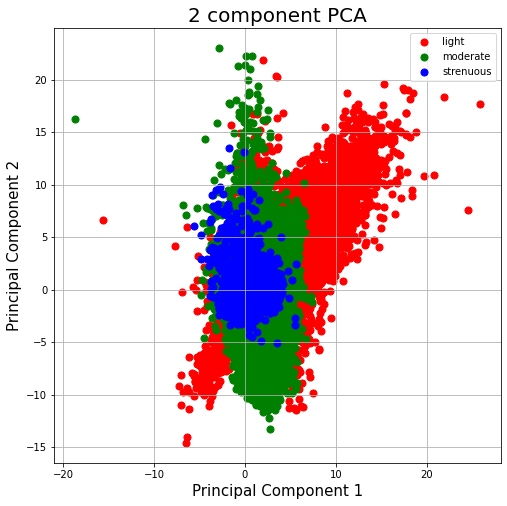

In [43]:
features = ['Heartrate','handAcc16_1','handAcc16_2','handAcc16_3']

# Separating out the features
x = New_set.loc[:, features].values

# Separating out the Intensity variable (prediction variable)
y = New_set.loc[:,['Intensity']].values

# Standardising the features
x = StandardScaler().fit_transform(x)

# Projecting 4 dimensions to 2 dimensions
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf1 = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

# Concatenating 2 dataframes together and dropping NAN values
finalDf2 = pd.concat([principalDf1, train_df[['Intensity']]], axis = 1)
final_frame = finalDf2.dropna()

# Plot results
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
Intensities = ['light', 'moderate', 'strenuous']
colors = ['r', 'g', 'b']

# Produce legend and graph colours 
for Intensity, color in zip(Intensities,colors):
    indicesToKeep = final_frame['Intensity'] == Intensity
    ax.scatter(final_frame.loc[indicesToKeep, 'principal component 1']
               , final_frame.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(Intensities)
ax.grid()
pca.explained_variance_ratio_

In this section I have created a list of features which I wish to apply Principal Component Analysis (PCA) to reduce the dimentionality from 4 to 2 dimensions to visualise a meaningful linear relationship for my data. Firstly, I standardised my data onto a unit scale for optimal performance to predict intensity. Then I reduced the dimensions to 2, known as principal 1 and 2, following this I added the Intensity column to this dataframe. From the graph we see that the clusters overlap with light datapoints forming a cluster taking a linear shape.

Also, both principal components take up 63.77% of the variance which is relatively low, where principal component 1 takes up 39.44% and principal component 2 takes up 24.33% as seen from the explained variance code, thus much of the variance is lost so the graph showing the different intensities may not be a useful visualisation of the features used.

In [44]:
train_df = train_df.drop(["Timestamp", "subject_id","Intensity"],1)

In [45]:
test_df = test_df.drop(["Timestamp", "subject_id","Intensity"],1)

Dropping Timestamp from the test_df as these values have no meaning in the following modelling test which would just contribute noise and not give reliabel results. Also, I dropped subject_ID as it's a categorical variables which is irrelevant for further processing and Intensity given that for testing I will use Activity_ID for better measure when training my model.

In [46]:
scaler = RobustScaler()
scale_train = train_df.copy()
scale_test = test_df.copy()

In [47]:
train_fit = scaler.fit_transform(scale_train.iloc[:,0:8])
test_fit = scaler.fit_transform(scale_test.iloc[:,0:8])

In [48]:
# Separating test and train set via Activity_ID column

# Train 
x_train = scale_train.drop('Activity_ID', axis=1).values
y_train = scale_train['Activity_ID'].values

# Test 
x_test = scale_test.drop('Activity_ID', axis=1).values
y_test = scale_test['Activity_ID'].values

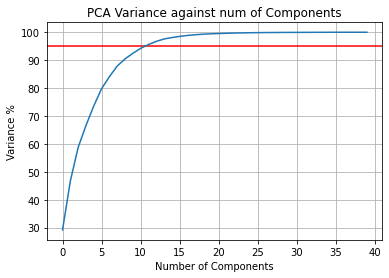

In [49]:
# Fit PCA on training set
pca = PCA()
pca.fit(x_train)

# Obtain variance of PCA 
variance= pca.explained_variance_ratio_
variance1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

# Plot graph of components compared to the variance they contain from original dataset
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('PCA Variance against num of Components')


line = plt.axhline(95, color="red")

plt.plot(variance1)
plt.grid()

In [50]:
# Setting components to 8

pca = PCA(n_components=8)

In [51]:
# Fitting PCA on training set only

pca.fit(x_train)

PCA(n_components=8)

In [52]:
# Applying mapping (transform) to both training and testing set 

x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

An ideal variance of our data will be around 90%+ to explain the data accurately. From the grid above comparing number of comnponents against Variance percentage, at 8 components the data will contain 95% of the variance which is a very high score. Using the PCA I transformed my data onto different scale and an array.

## 7.2 Logistic Regression

In [53]:
# Set log_reg as logistic regression

log_reg = LogisticRegression()

In [54]:
# Train model on data

log_reg.fit(x_train,y_train)

/Users/faheemshahin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [55]:
log_reg.score(x_test,y_test)

0.6471723605481567

I carried out out logistic regression given that this regression analysis can take binary or continuous data so it's an appropraite choice for testing as a model. From model training we receive a score of 64.66% which is ok but can be improved with further training and different datasets.

## 7.3 Linear Regression

In [56]:
lin_reg = LinearRegression()

In [57]:
lin_reg.fit(x_train,y_train)

LinearRegression()

In [58]:
lin_reg.score(x_test,y_test)

0.2059990886500651

Similarly, I used linear regresion as it attempts to model the relationship between two variables by fitting a linear equation to observed data. One being considered the activity variable, and the other being the rest if the categories scaled down. From the score we get 20.5% which is incredibley low suggesting this model to predict values.

## 7.4 Linear Regression on the Prediction Heartrate

In [59]:
# Creating dataframe using accelerometer, heartrate and intensity

Model_frame = pd.DataFrame()
Model_frame['Intensity'] = New_set['Intensity']
Model_frame['Avg_Accelerometer'] = (New_set['handAcc16_1']+New_set['handAcc16_2']+New_set['handAcc16_3'])/3
Model_frame['Heartrate'] = New_set['Heartrate']
Model_frame

,Intensity,Avg_Accelerometer,Heartrate
2928,light,5.360660,100.0
2929,light,5.236503,100.0
2930,light,5.085573,100.0
2931,light,5.086983,100.0
2932,light,5.217407,100.0
...,...,...,...
2872015,strenuous,5.537257,162.0
2872016,strenuous,5.471683,162.0
2872017,strenuous,5.420900,162.0
2872018,strenuous,5.420890,162.0


In [60]:
# Get dummy columns

dummies = pd.get_dummies(Model_frame.Intensity)


# Concatenate dummy dataframe with original dataframe

merged_frame = pd.concat([Model_frame,dummies],axis = 'columns')

In [61]:
# Remove Intensity column

final_model = merged_frame.drop(['Intensity','moderate'],axis='columns')
final_model

,Avg_Accelerometer,Heartrate,light,strenuous
2928,5.360660,100.0,1,0
2929,5.236503,100.0,1,0
2930,5.085573,100.0,1,0
2931,5.086983,100.0,1,0
2932,5.217407,100.0,1,0
...,...,...,...,...
2872015,5.537257,162.0,0,1
2872016,5.471683,162.0,0,1
2872017,5.420900,162.0,0,1
2872018,5.420890,162.0,0,1


In [62]:
lin_reg2 = LinearRegression()

In [63]:
# Dataframe with heartrate dropped

X = final_model.drop('Heartrate',axis='columns')

# Column of heartrates

Y = final_model.Heartrate

In [64]:
lin_reg2.fit(X,Y)

LinearRegression()

In [65]:
lin_reg2.score(X,Y)

0.652211648016044

In this linear regression model I decided to take a different approach by trying to predict heartrate from the intensity level and the average hand accelerometer. To do this I introduced a dummy variable to split the Intensity categorical data into numerical values. I removed the moderate dummy column, given that the variables are multicollinear which can be a detriment to the model. Then by creating a dataframe we can apply it to a linear regression and use it to predict the heartrate for a given intensity level of light and strenuous with the accelerometer value. My score result is 65.22% which isn't bad but can be improved significantly. 

# 8. Summary

Firstly, I began my investigation by cleaning the data, so removing NaN values with the utilisation of the interpolation and mean imputation to simultaneously retain the variation and have avoid reducing the power of my analysis. Then I used Shapiro Wilk test, histogram and QQ plots to understand the normality of my data further but having a fairly large dataset the normality null hypothesis would be rejected as the p-value came to 0. Therefore, I used the central limit theorem to show that when randomly sample means are selected, as the sample size increases, the sample mean and standard deviation will be closer in value to the population mean μ and standard deviation σ. This in turn tends to a normal distribution for heartrate and temperature of all 3 body parts as they were the speculated to be the most useful variables for this investigation. Afterwards, I split the data into a train and test dataframe to use in the EDA where I began with showing how many datapoints I have among the subjects and compared them to heartrate and temperatures using barcharts. 

I also categorised together activities into 3 separate subgroups as a measure of intensity to compare to heartrate. Overall, I discovered that temperature plays a trivial role in determining the level of physical activity as it was more dependent on the subject not activity whereas heartrate and accelerometer appeared to have more correlation to the activities involved. In addition, I carried out a hypothesis investigation on whether the mean heartrate differed for strenuous and light activites in which it proved to be true and more strenuous activities do have a significantly higher mean heartrate which is useful for measureing heartrate.

Following this I used PCA to produce a 2D plane by reducing the dimensionality of the relevant variables which revealed to be not accurate as the variance carried over was very small so not representative of my data. Then I tested a logistic and linear regression model on my data with the logistic model proving to be a better fit although both model could imrpove their score with more training data. Afterwards, I used a different linear regression to predict heartrate from the intensity level and mean accelerometer, I had to introduce a dummy variable to incorporate the use of a categorical variable and the score of this regression model came to 65% similar to that of logistic regression model. Therefore these are fairly good measures of heartrate and exercise which are very useful in determining physical activity on an individual.

A valid point to raise is that the data wasn't evenly distributed in the number of subjects and how many activities were carried out by each one which may affect the reliability of this project. So, for future improvements I will let all subjects carry out the same subjects in sequential order and another set in various orders with the inclusion of adding more features such as the previous activity carried out or previous heartrate with the use of more preprocessing techniques. 